In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


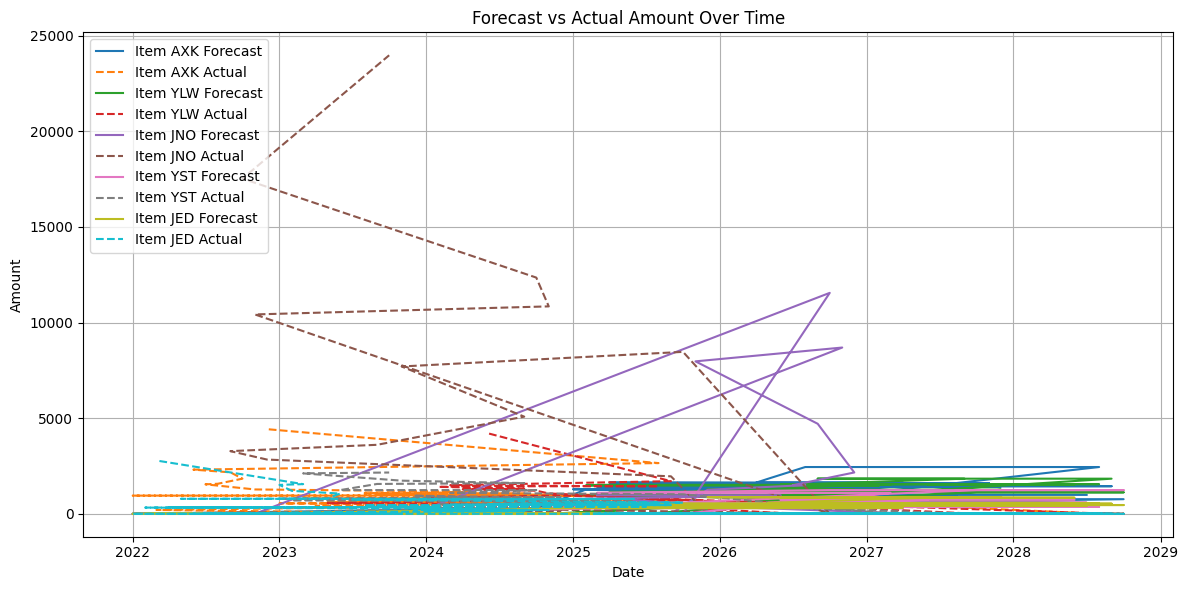

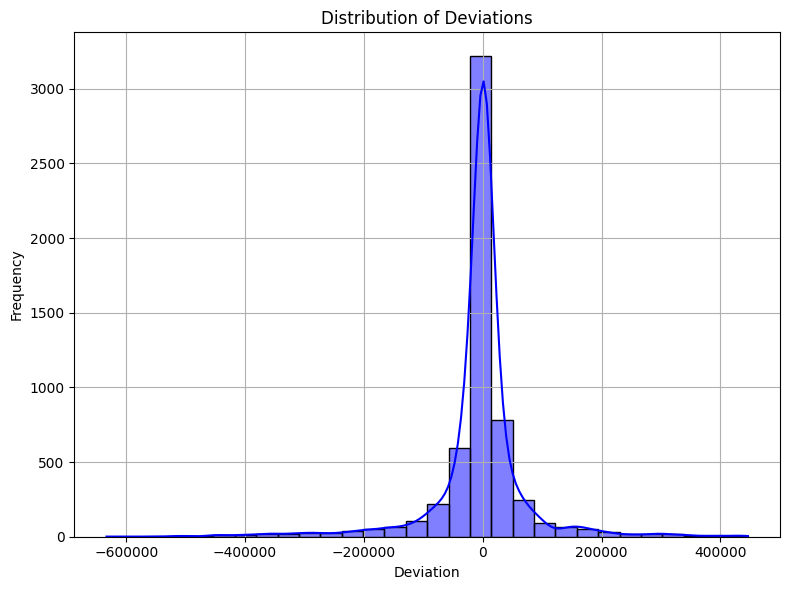

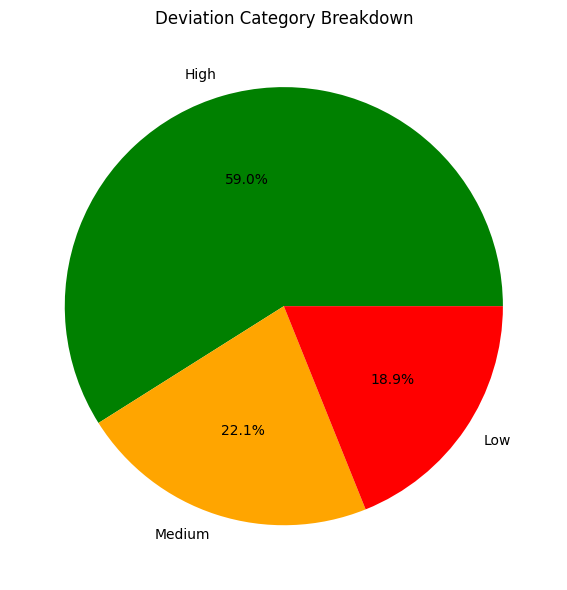

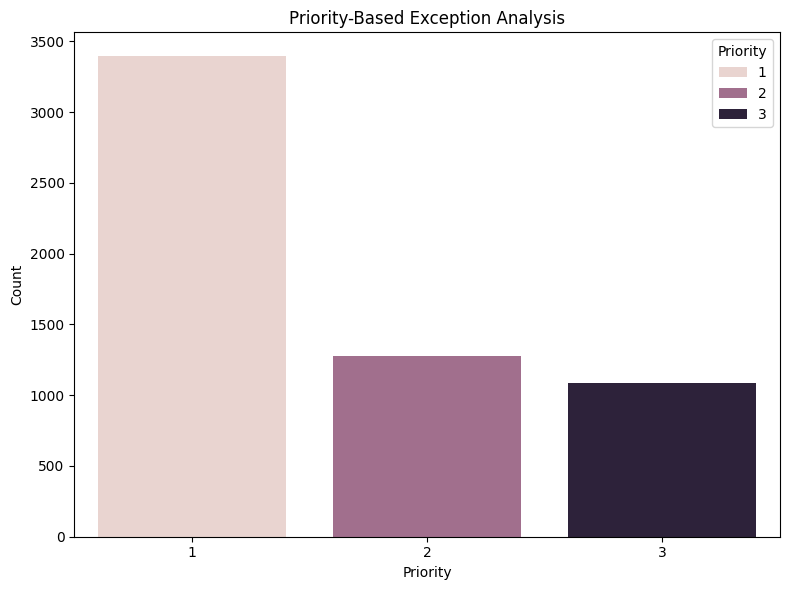

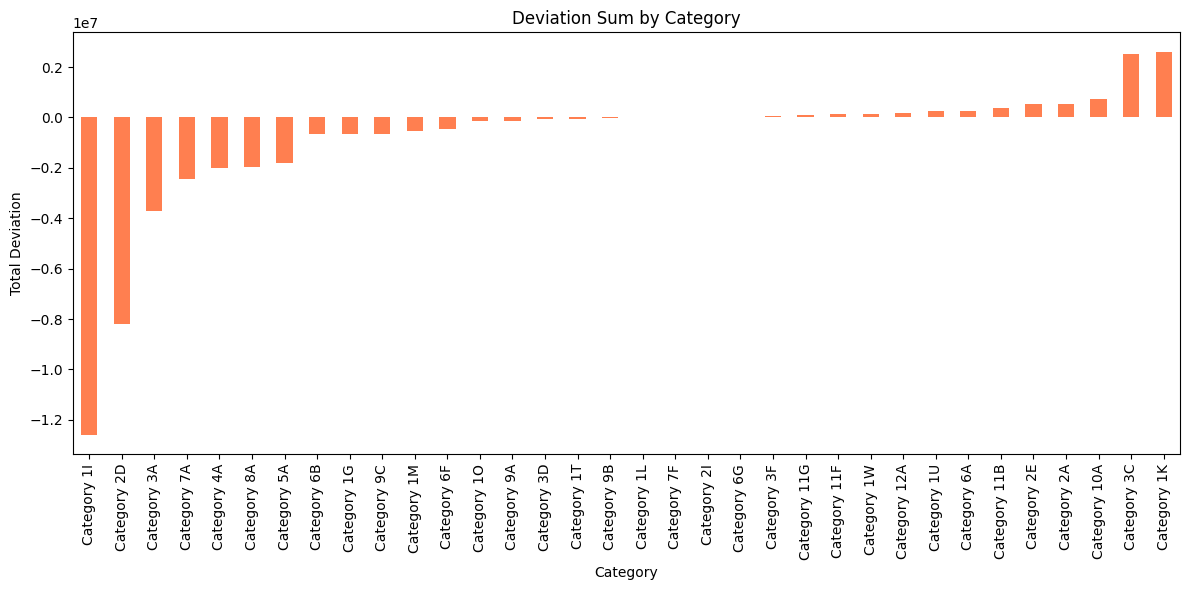

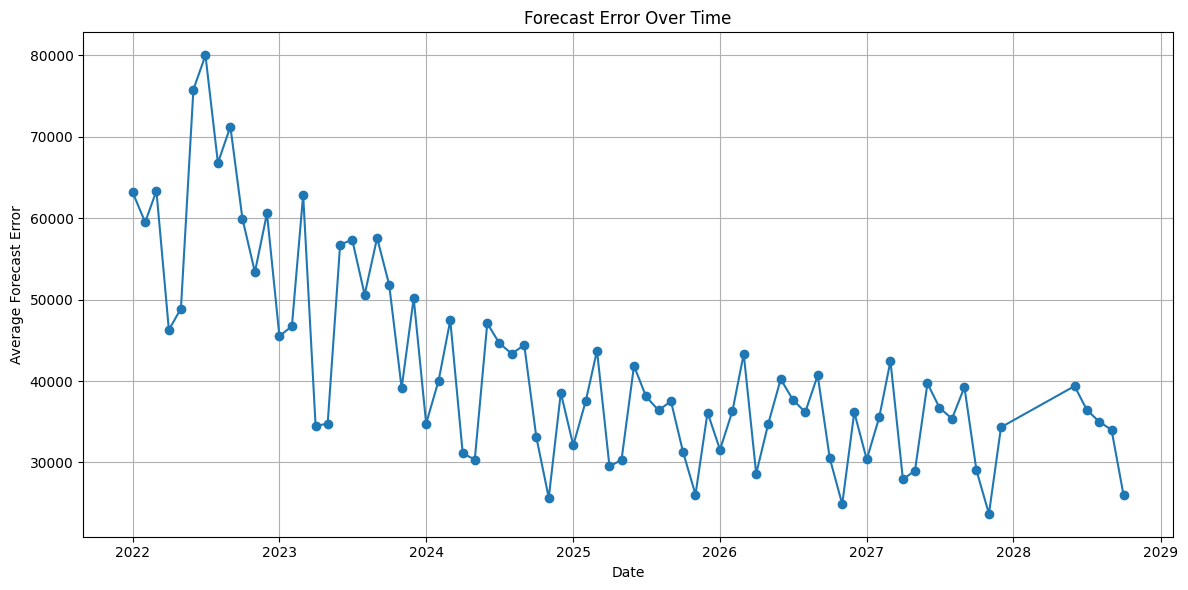

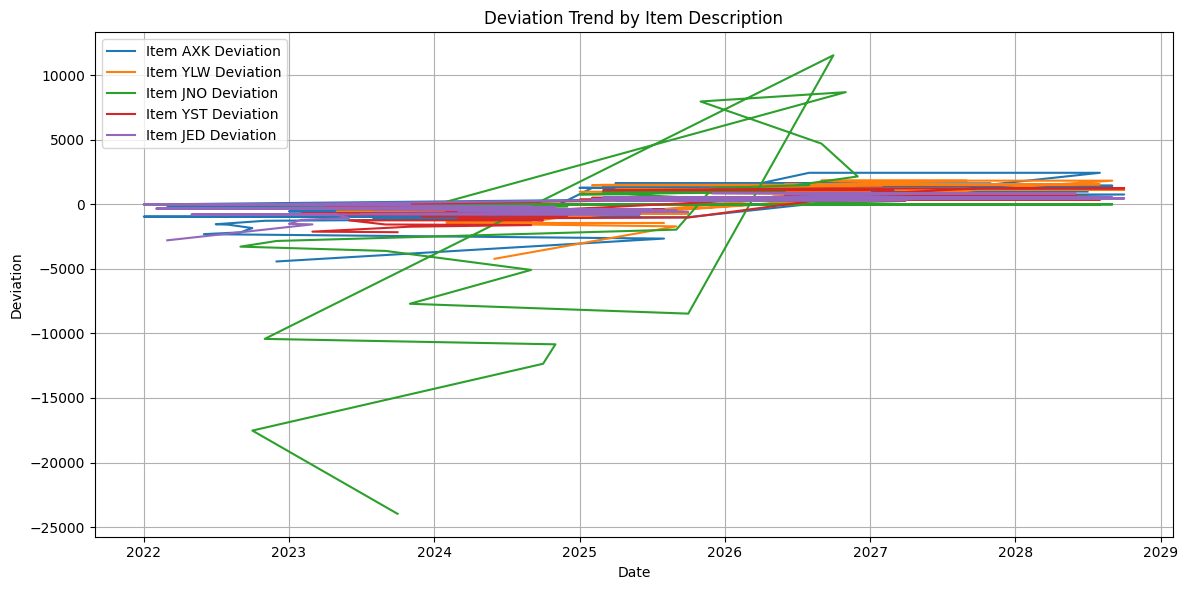

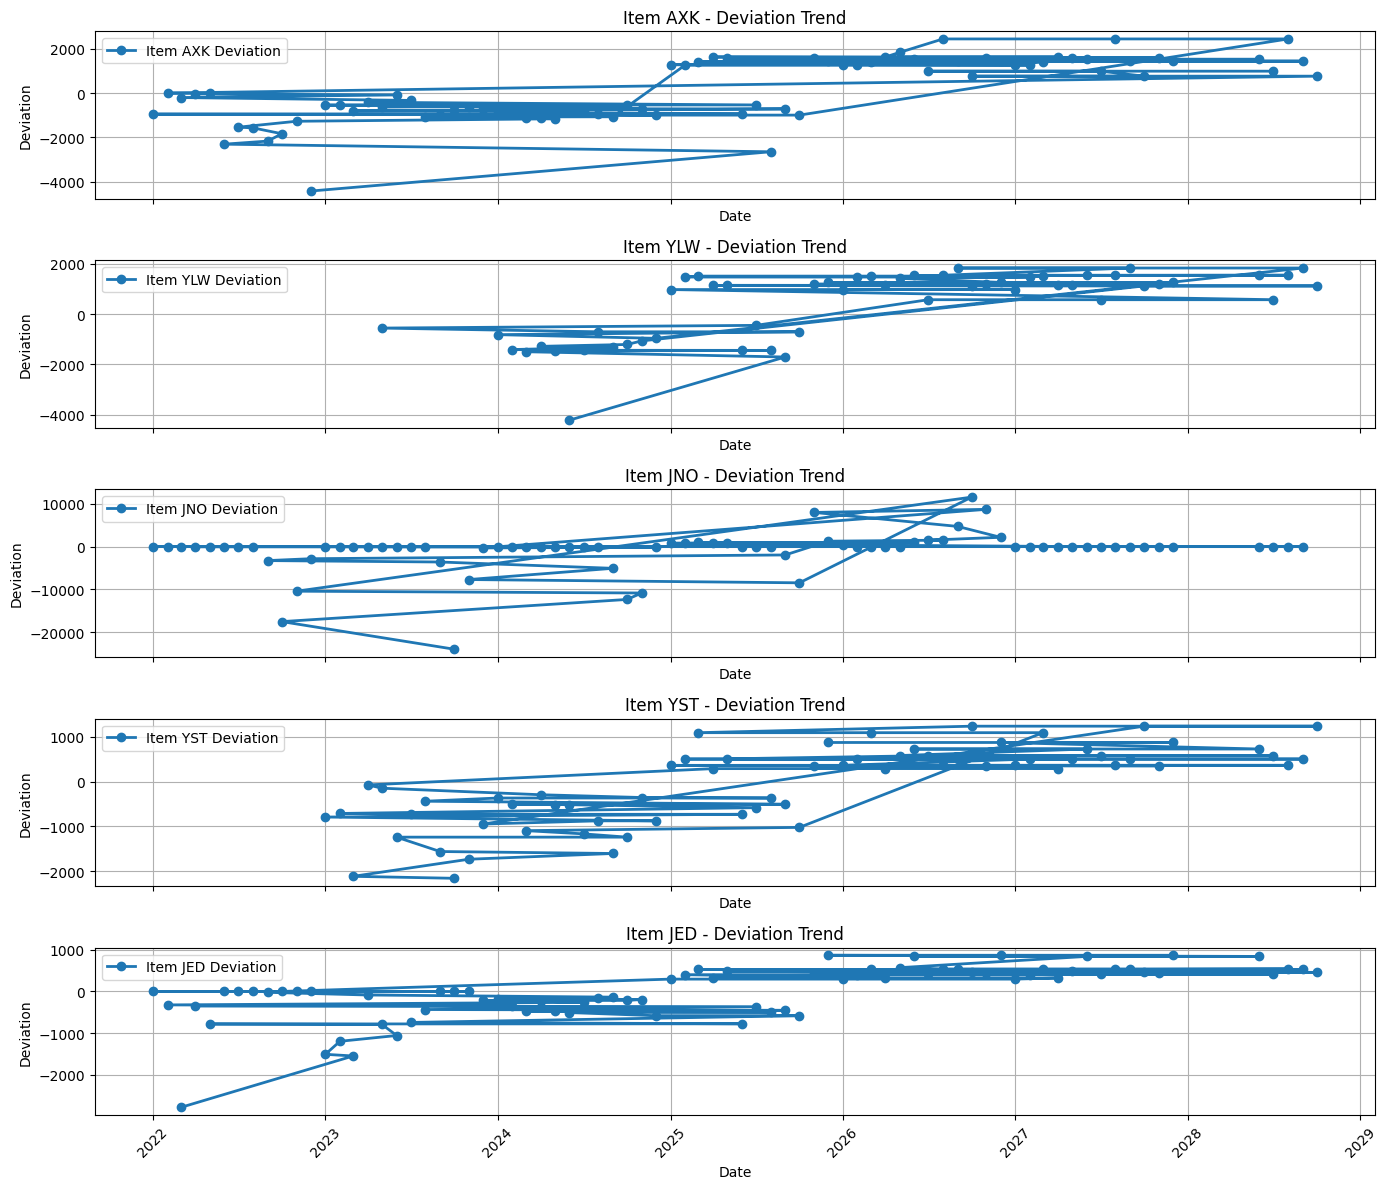

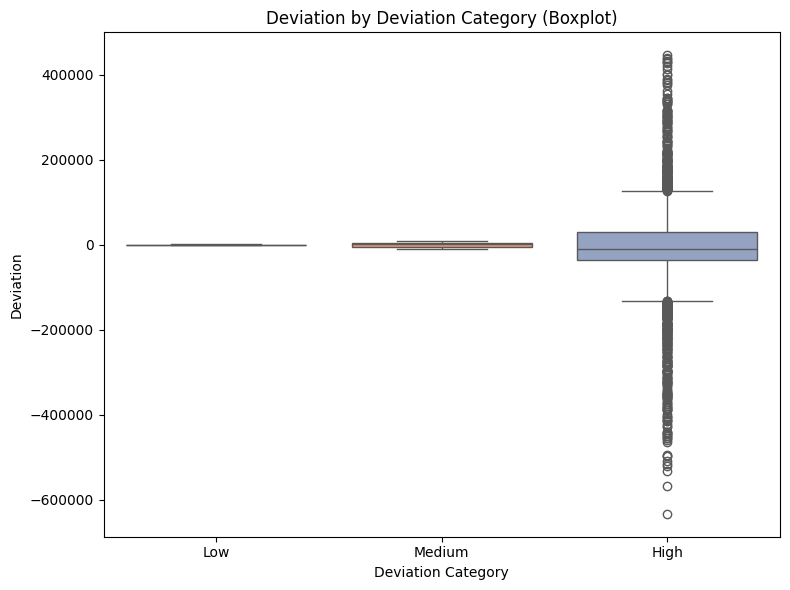

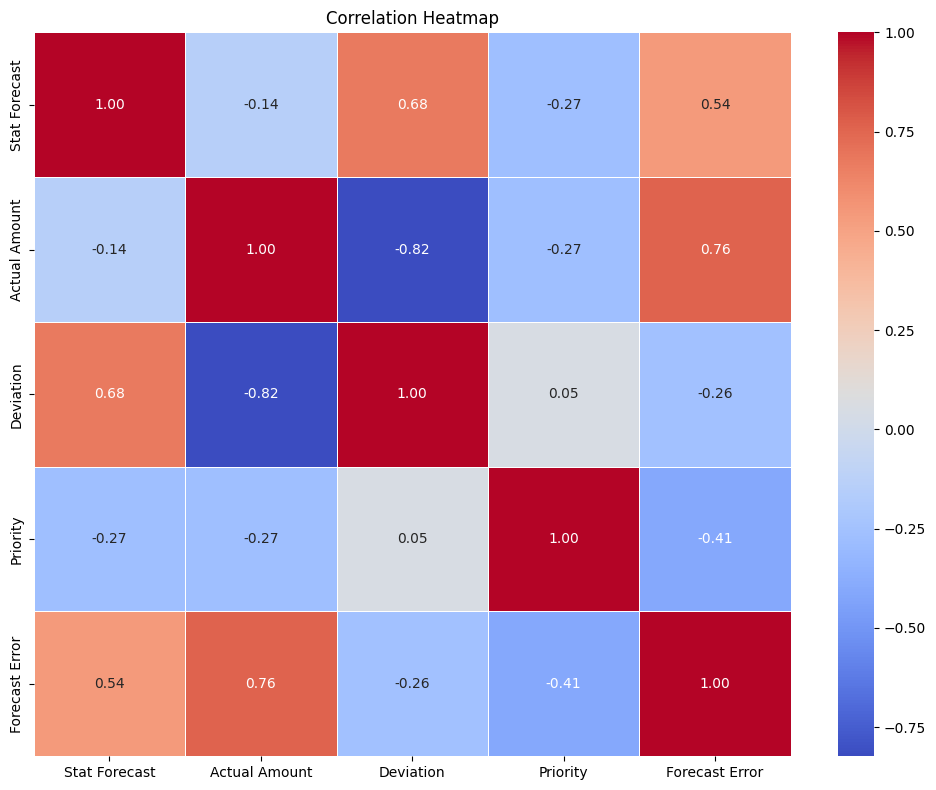

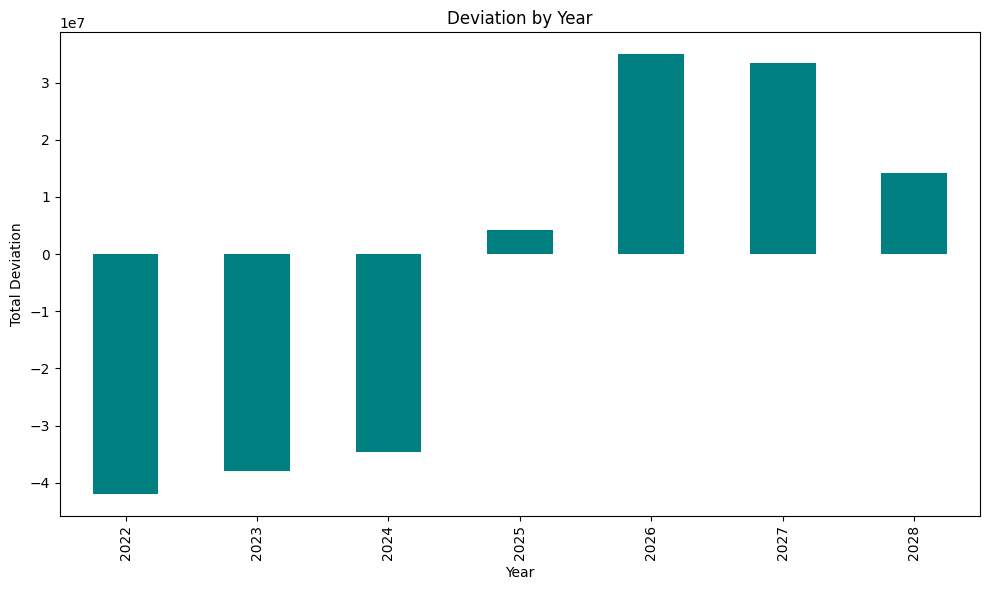

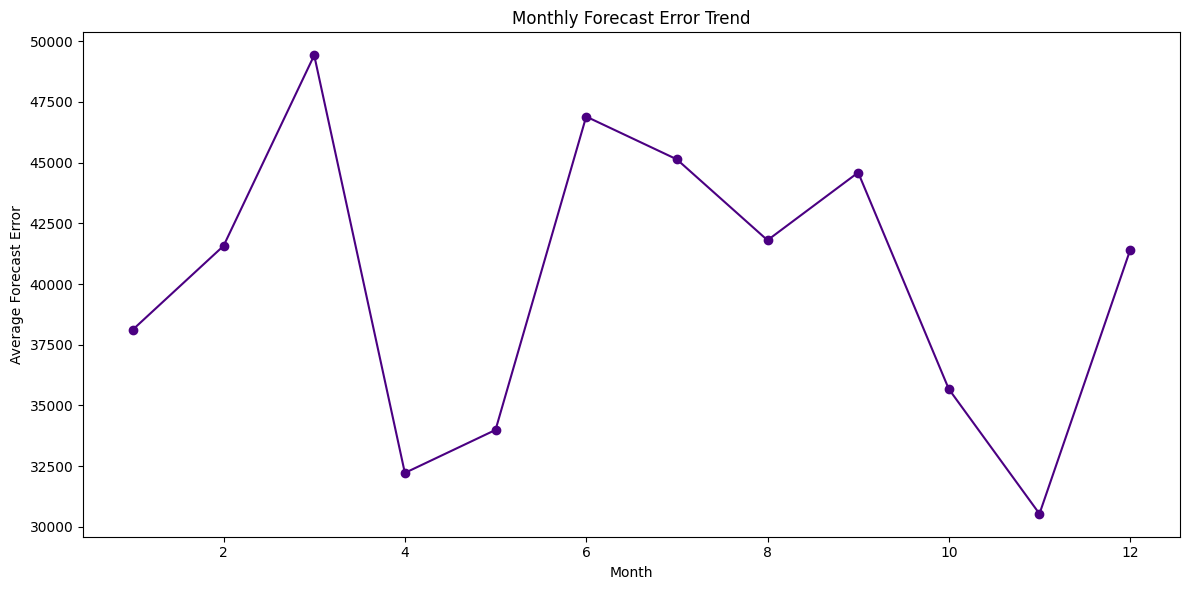

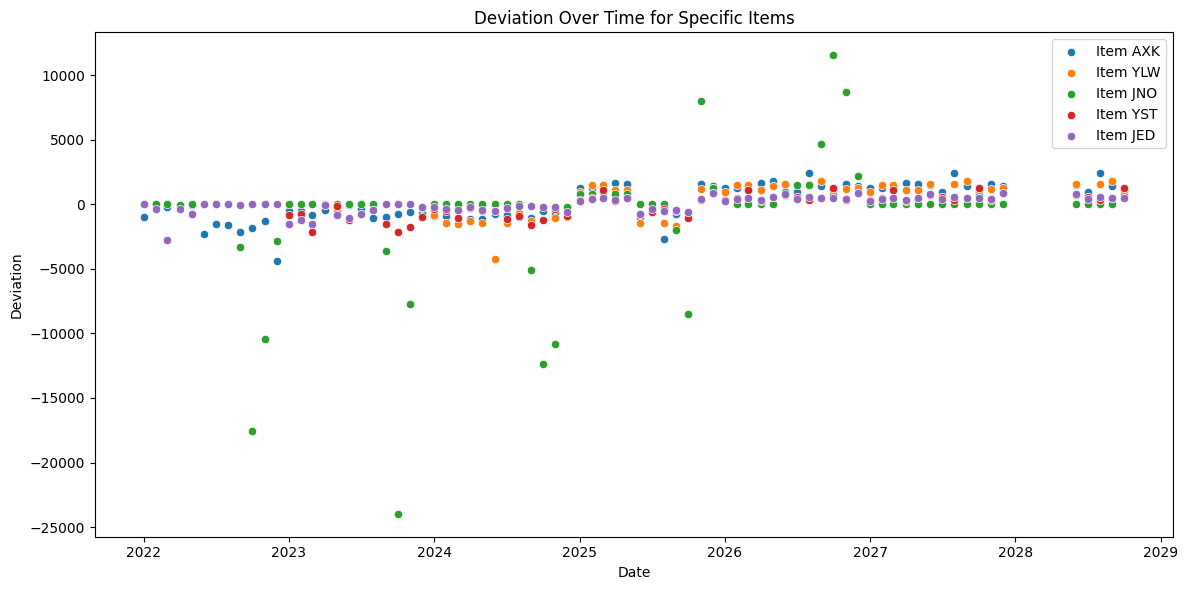

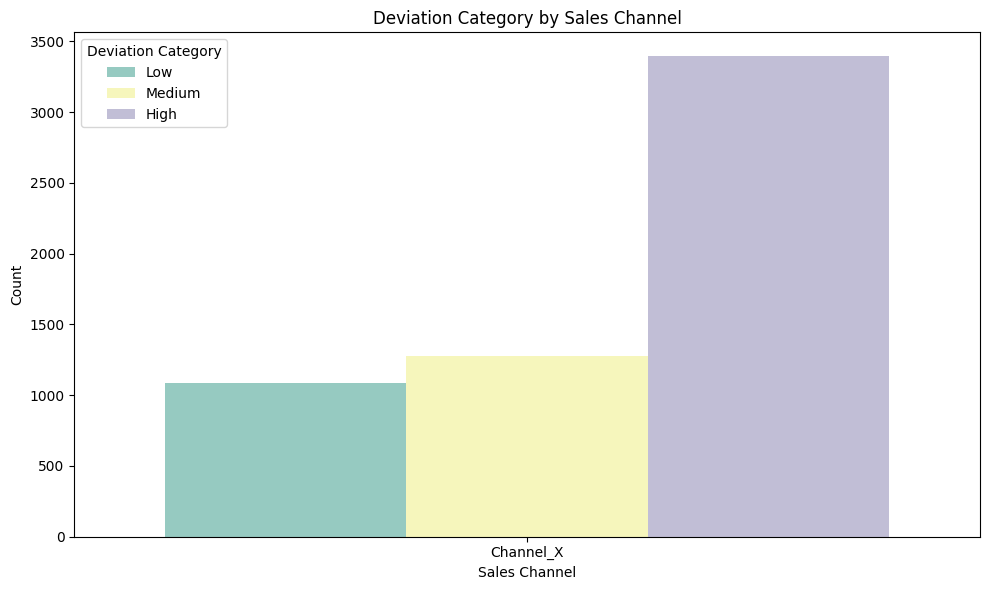

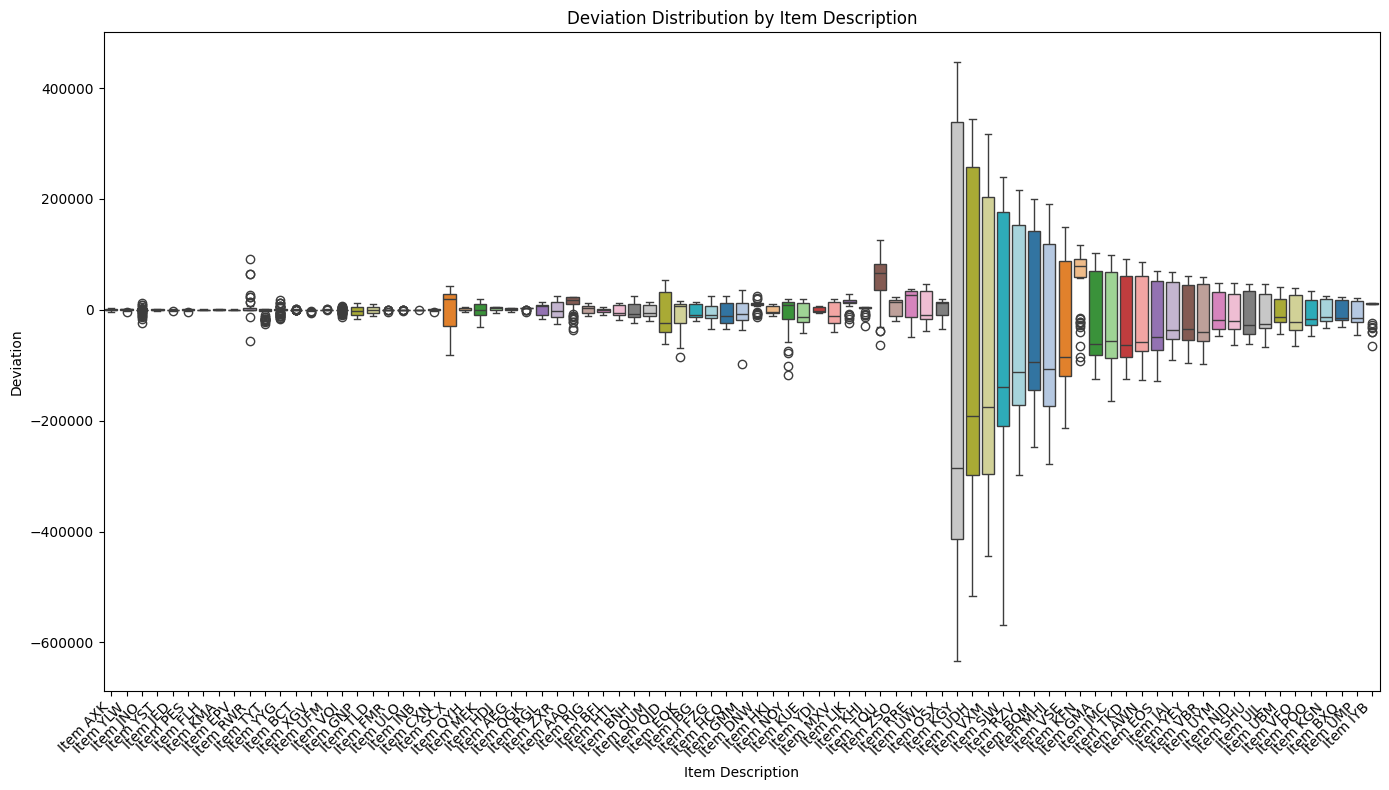

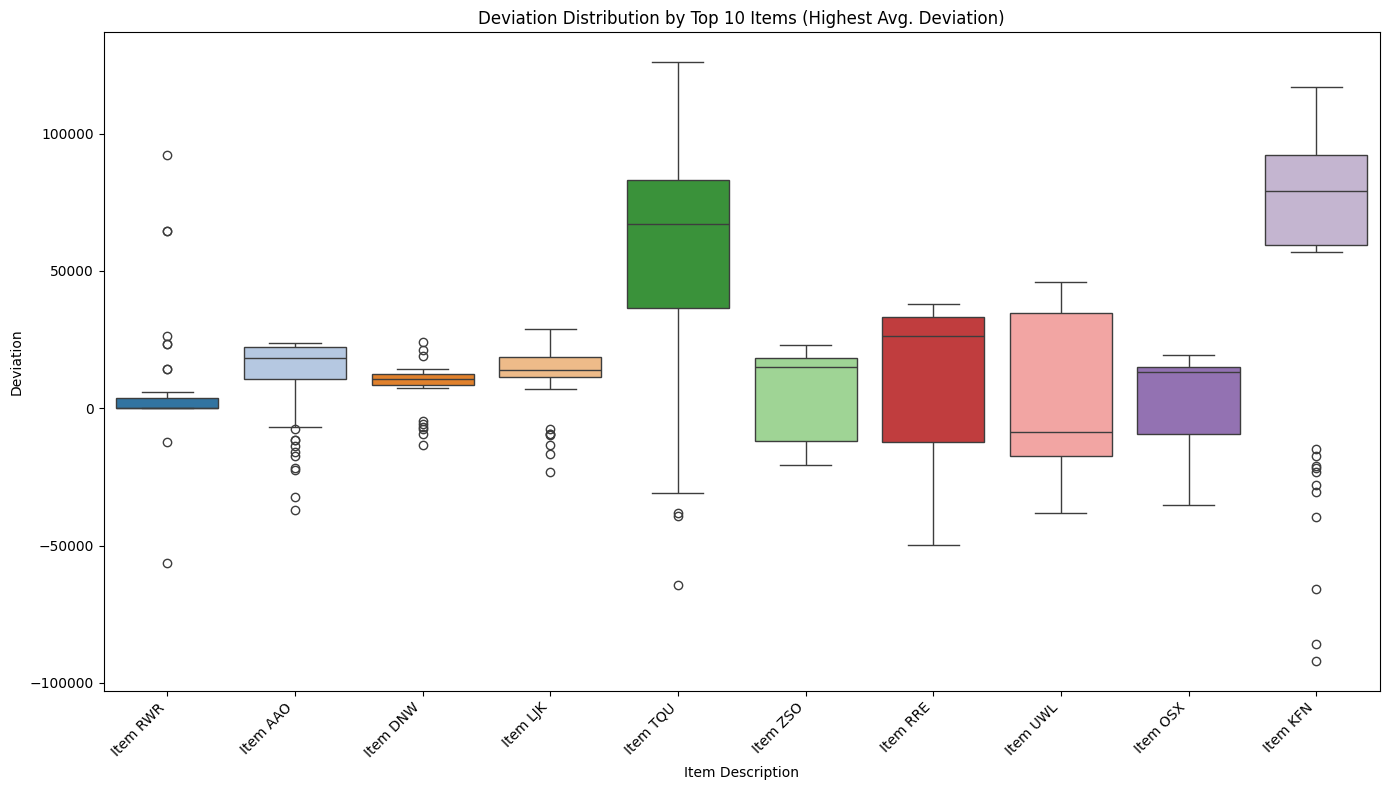

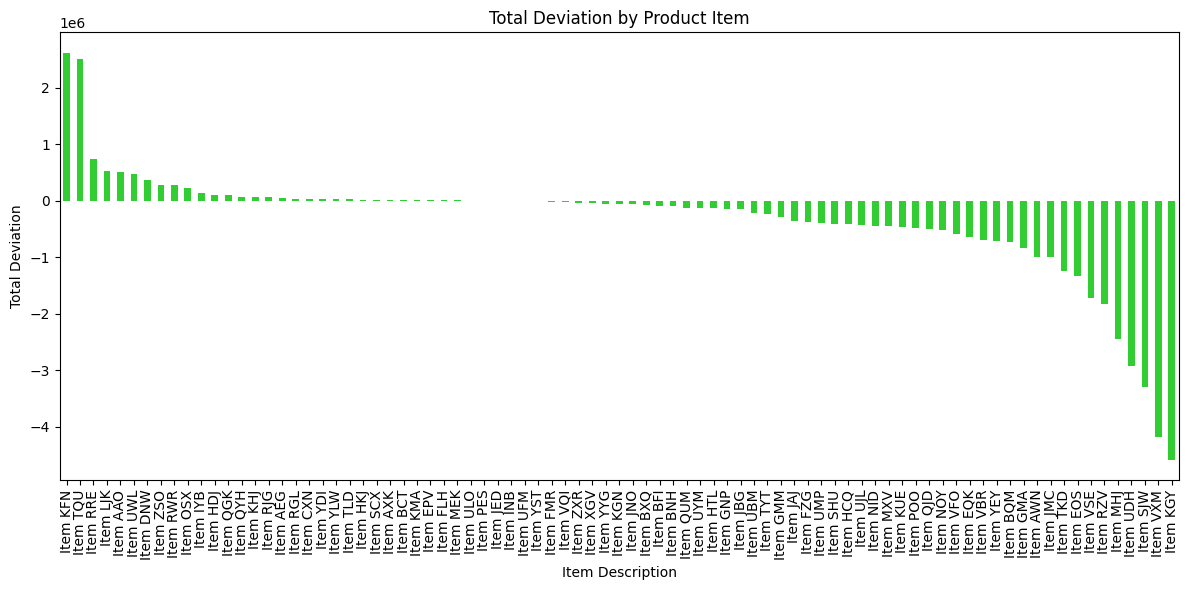

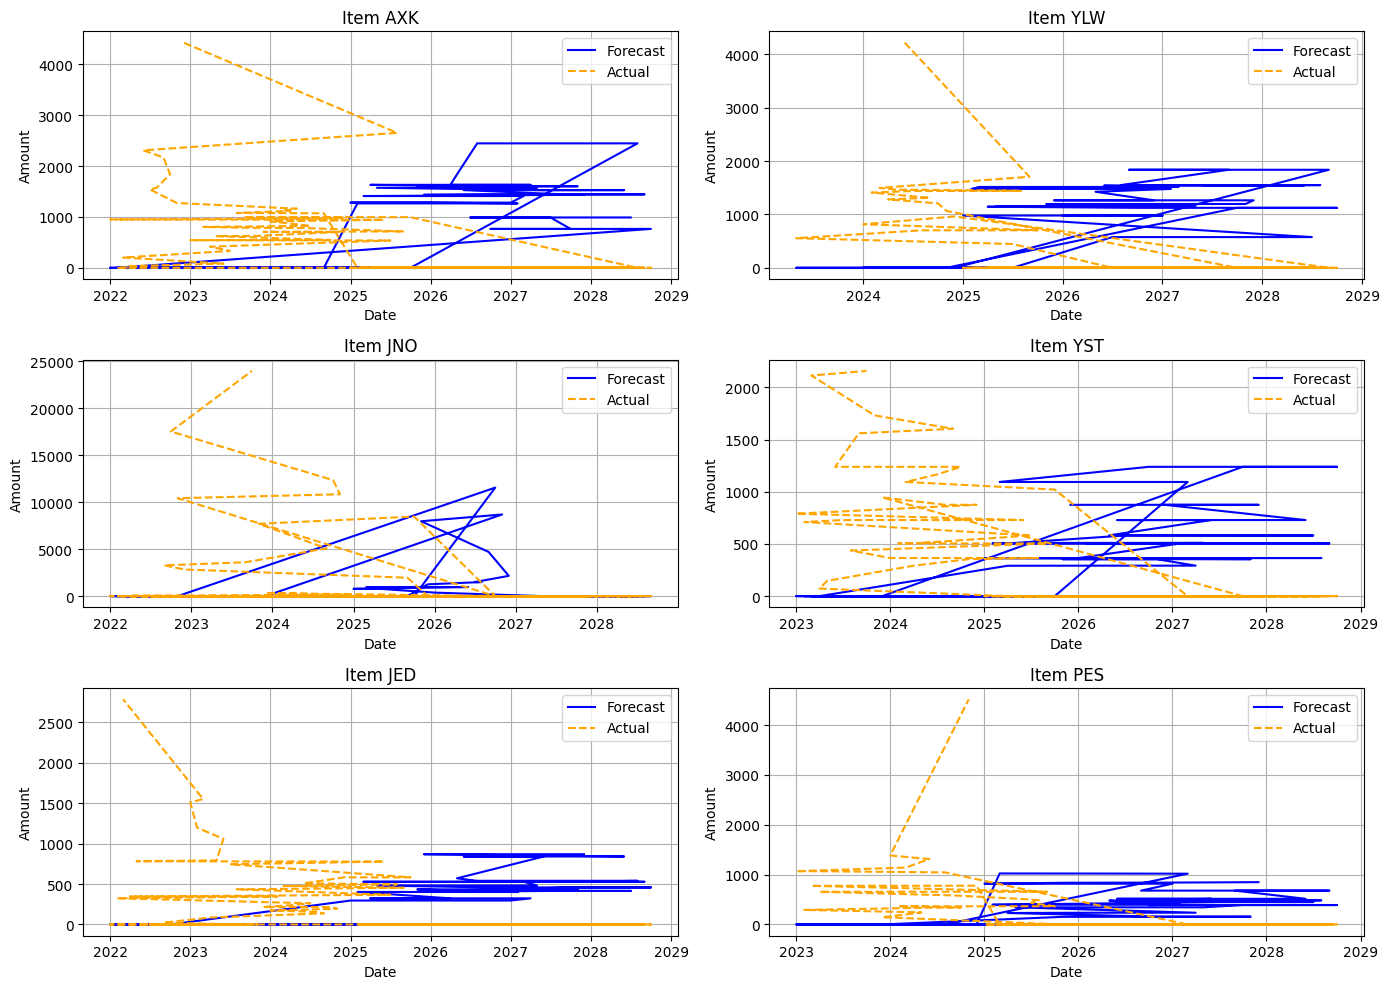

In [ ]:

# Load the dataset
file_path = 'priority_data_fixed.csv'
data = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')




# Plot 1: Forecast vs Actual Amount over time (for first 5 items)
plt.figure(figsize=(12, 6))
for item in data['Item Description'].unique()[:5]:  # Limiting to first 5 items for clarity
    subset = data[data['Item Description'] == item]
    plt.plot(subset['Date'], subset['Stat Forecast'], label=f'{item} Forecast')
    plt.plot(subset['Date'], subset['Actual Amount'], linestyle='--', label=f'{item} Actual')
plt.title('Forecast vs Actual Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

# Plot 2: Deviation Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Deviation'], bins=30, kde=True, color='blue')
plt.title('Distribution of Deviations')
plt.xlabel('Deviation')
plt.ylabel('Frequency')
plt.grid()
plt.tight_layout()
plt.show()

# Plot 3: Deviation Category Breakdown
plt.figure(figsize=(8, 6))
data['Deviation Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'orange', 'red'])
plt.title('Deviation Category Breakdown')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Plot 4: Priority-Based Exception Analysis
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Priority', hue='Priority', order=[1, 2, 3])
plt.title('Priority-Based Exception Analysis')
plt.xlabel('Priority')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



# Plot 6: Category-Level Performance (Deviation Sum)
plt.figure(figsize=(12, 6))
deviation_by_category = data.groupby('PH2')['Deviation'].sum().sort_values()
deviation_by_category.plot(kind='bar', color='coral')
plt.title('Deviation Sum by Category')
plt.xlabel('Category')
plt.ylabel('Total Deviation')
plt.tight_layout()
plt.show()

# Plot 7: Forecast Accuracy Over Time
plt.figure(figsize=(12, 6))
data['Forecast Error'] = (data['Stat Forecast'] - data['Actual Amount']).abs()
error_trend = data.groupby('Date')['Forecast Error'].mean()
plt.plot(error_trend.index, error_trend.values, marker='o', linestyle='-')
plt.title('Forecast Error Over Time')
plt.xlabel('Date')
plt.ylabel('Average Forecast Error')
plt.grid()
plt.tight_layout()
plt.show()



# Plot 10: Trend Analysis by Item Description
plt.figure(figsize=(12, 6))
for item in data['Item Description'].unique()[:5]:
    subset = data[data['Item Description'] == item]
    plt.plot(subset['Date'], subset['Deviation'], label=f'{item} Deviation')
plt.title('Deviation Trend by Item Description')
plt.xlabel('Date')
plt.ylabel('Deviation')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

# Plot 10: Trend Analysis by Item Description (Subplots for Clarity)
# Limit the number of items plotted to the top 5 for clarity
top_items = data['Item Description'].unique()[:5]

# Create subplots with the number of rows equal to the number of items
fig, axes = plt.subplots(nrows=len(top_items), ncols=1, figsize=(14, 12), sharex=True)

# Loop through each item and plot its deviation trend on a separate subplot
for i, item in enumerate(top_items):
    subset = data[data['Item Description'] == item]
    axes[i].plot(subset['Date'], subset['Deviation'], label=f'{item} Deviation', marker='o', linestyle='-', linewidth=2)
    axes[i].set_title(f'{item} - Deviation Trend')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Deviation')
    axes[i].grid(True)
    axes[i].legend(loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout for clarity and avoid overlap
plt.tight_layout()
plt.show()





# Plot 11: Boxplot of Deviation by Deviation Category
plt.figure(figsize=(8, 6))
sns.boxplot(x='Deviation Category', y='Deviation', data=data,hue='Deviation Category',legend=False, palette='Set2')
plt.title('Deviation by Deviation Category (Boxplot)')
plt.xlabel('Deviation Category')
plt.ylabel('Deviation')
plt.tight_layout()
plt.show()

# Plot 12: Correlation Heatmap (Numerical Columns)
plt.figure(figsize=(10, 8))
correlation_matrix = data[['Stat Forecast', 'Actual Amount', 'Deviation', 'Priority', 'Forecast Error']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Plot 13: Deviation by Year
plt.figure(figsize=(10, 6))
data['Year'] = data['Date'].dt.year
deviation_by_year = data.groupby('Year')['Deviation'].sum()
deviation_by_year.plot(kind='bar', color='teal')
plt.title('Deviation by Year')
plt.xlabel('Year')
plt.ylabel('Total Deviation')
plt.tight_layout()
plt.show()

# Plot 14: Monthly Forecast Error Trend
plt.figure(figsize=(12, 6))
data['Month'] = data['Date'].dt.month
monthly_error_trend = data.groupby('Month')['Forecast Error'].mean()
monthly_error_trend.plot(kind='line', marker='o', color='indigo')
plt.title('Monthly Forecast Error Trend')
plt.xlabel('Month')
plt.ylabel('Average Forecast Error')
plt.tight_layout()
plt.show()

# Plot 16: Deviation over Time for Specific Items (Scatter Plot)
plt.figure(figsize=(12, 6))
for item in data['Item Description'].unique()[:5]:
    subset = data[data['Item Description'] == item]
    sns.scatterplot(data=subset, x='Date', y='Deviation', label=item)
plt.title('Deviation Over Time for Specific Items')
plt.xlabel('Date')
plt.ylabel('Deviation')
plt.legend()
plt.tight_layout()
plt.show()

# Plot 17: Deviation Category by Sales Channel
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Sales Channel', hue='Deviation Category', palette='Set3')
plt.title('Deviation Category by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Boxplot of Deviation by Item Description
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x='Item Description', y='Deviation', palette='tab20', hue='Item Description', legend=False)
plt.title('Deviation Distribution by Item Description')
plt.xlabel('Item Description')
plt.ylabel('Deviation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Plot 18: Top 10 items with the highest average deviation (Boxplot)
top_items_by_deviation = data.groupby('Item Description')['Deviation'].mean().sort_values(ascending=False).head(10).index

# Filter the dataset to include only these items
filtered_data = data[data['Item Description'].isin(top_items_by_deviation)]

# Plot the boxplot with 'hue' assignment
plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered_data, x='Item Description', y='Deviation', hue='Item Description', palette='tab20', legend=False)
plt.title('Deviation Distribution by Top 10 Items (Highest Avg. Deviation)')
plt.xlabel('Item Description')
plt.ylabel('Deviation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()






# Plot 19: Total Deviation by Product Item
plt.figure(figsize=(12, 6))
total_deviation_by_item = data.groupby('Item Description')['Deviation'].sum().sort_values(ascending=False)
total_deviation_by_item.plot(kind='bar', color='limegreen')
plt.title('Total Deviation by Product Item')
plt.xlabel('Item Description')
plt.ylabel('Total Deviation')
plt.tight_layout()
plt.show()


# Plot 20: Historical Forecast vs Actuals for Top Items (Subplots for Clarity)
top_items = data['Item Description'].unique()[:6]  # Limit to the first 5 unique items

plt.figure(figsize=(14, 10))
for i, item in enumerate(top_items, start=1):
    subset = data[data['Item Description'] == item]
    plt.subplot(3, 2, i)  # Creating a 3x2 grid for subplots
    plt.plot(subset['Date'], subset['Stat Forecast'], label='Forecast', color='blue')
    plt.plot(subset['Date'], subset['Actual Amount'], linestyle='--', label='Actual', color='orange')
    plt.title(f'{item}')
    plt.xlabel('Date')
    plt.ylabel('Amount')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()



